In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# *1.* vgg16

In [ ]:
# imports

from keras.applications import vgg16
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [ ]:
# parameters setup

imgs_path = '/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/'
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5 # number of most similar images to retrieve

In [ ]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("number of images:",len(files))

number of images: 361


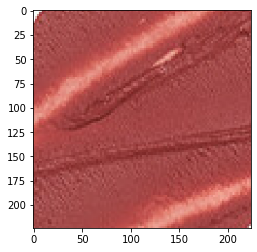

image loaded successfully!


In [ ]:
# load an image in PIL format
original = load_img(files[0], target_size=(imgs_model_width, imgs_model_height)) # 첫번째 
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [ ]:
# convert the PIL image to a numpy array
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [ ]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

1/1 [==============================] - 1s 1s/step
features successfully extracted!
number of image features: 4096


array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files: # 시간 좀 걸림 (2분)
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [ ]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs) # 시간 다소 걸림 (5분)

print("features successfully extracted!")
imgs_features.shape

12/12 [==============================] - 196s 16s/step
features successfully extracted!


(361, 4096)

In [ ]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_3.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_1.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_2.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_4.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_5.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_6.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_7.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_8.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_9.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_10.jpg,...,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/48_에스칸달로!.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/48_스위티.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/48_이머전시.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/48_임펄시브.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/48_모어.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/48_빌리언.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/48_스매쉬.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/48_디보티드.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/48_리조트.jpg,/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/48_쏘리.jpg
/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_3.jpg,1.000000,0.875217,0.909697,0.934816,0.915653,0.952569,0.901291,0.907597,0.872178,0.885289,...,0.238292,0.239987,0.317117,0.368474,0.275140,0.290938,0.297566,0.298968,0.285642,0.280548
/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_1.jpg,0.875217,1.000000,0.930442,0.828519,0.836147,0.867081,0.849220,0.842373,0.714703,0.857620,...,0.238964,0.230836,0.301238,0.357904,0.262515,0.273268,0.276947,0.284057,0.277076,0.298617
/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_2.jpg,0.909697,0.930442,1.000000,0.892152,0.913141,0.889447,0.901528,0.915584,0.774197,0.891112,...,0.252464,0.251731,0.305612,0.367084,0.272285,0.281525,0.289364,0.291699,0.292811,0.283269
/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_4.jpg,0.934816,0.828519,0.892152,1.000000,0.931401,0.893702,0.912093,0.911588,0.899607,0.850060,...,0.272090,0.253321,0.331400,0.371092,0.288251,0.306974,0.311954,0.323300,0.304903,0.294635
/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/1_5.jpg,0.915653,0.836147,0.913141,0.931401,1.000000,0.891506,0.939047,0.947116,0.874675,0.881898,...,0.256672,0.241187,0.307002,0.353461,0.265156,0.287305,0.289367,0.296210,0.285387,0.272612


In [ ]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


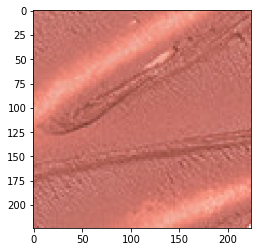

-----------------------------------------------------------------------
most similar products:


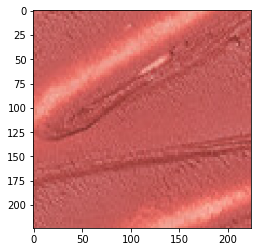

similarity score :  0.9304424


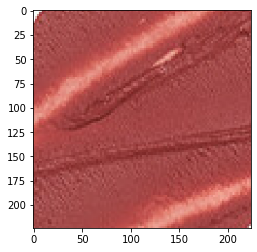

similarity score :  0.87521726


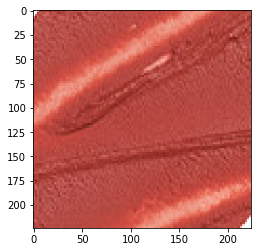

similarity score :  0.8670813


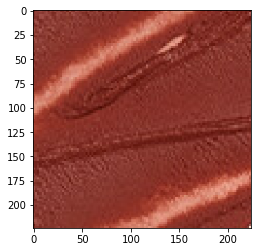

similarity score :  0.85761964


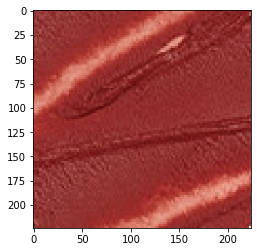

similarity score :  0.84922


In [ ]:
retrieve_most_similar_products(files[1])

-----------------------------------------------------------------------
original product:


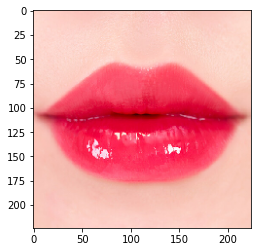

-----------------------------------------------------------------------
most similar products:


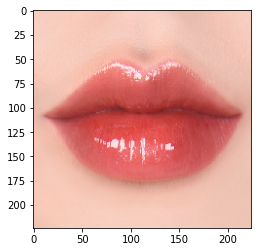

similarity score :  0.9190178


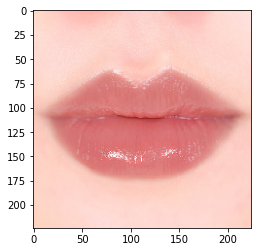

similarity score :  0.90461046


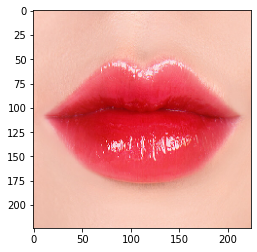

similarity score :  0.9014352


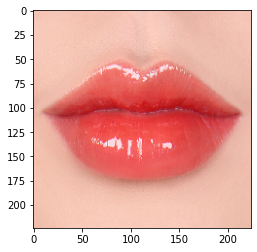

similarity score :  0.8984082


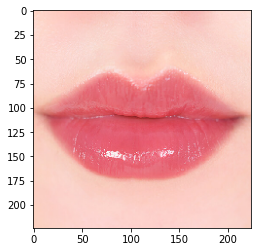

similarity score :  0.8971451


In [ ]:
retrieve_most_similar_products(files[100])

-----------------------------------------------------------------------
original product:


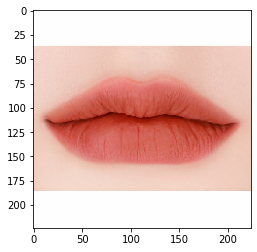

-----------------------------------------------------------------------
most similar products:


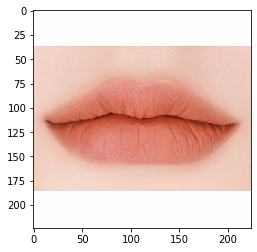

similarity score :  0.9868862


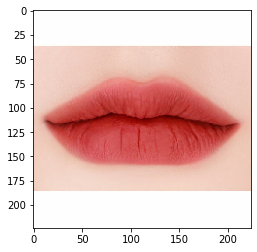

similarity score :  0.98470914


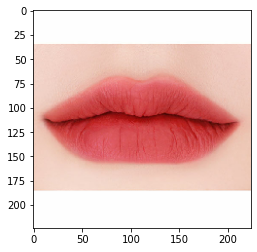

similarity score :  0.98086435


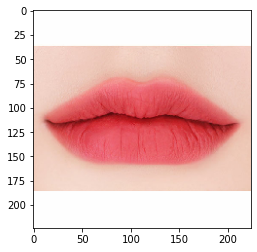

similarity score :  0.9704511


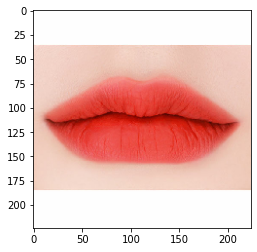

similarity score :  0.9611761


In [ ]:
retrieve_most_similar_products(files[300])

- 문제 : 색상이 아닌 object 위주로 유사도를 측정함

# *2.* inception V3

In [ ]:
!git clone https://github.com/tensorflow/models.git # Inception V3 사용

Cloning into 'models'...
remote: Enumerating objects: 79599, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 79599 (delta 156), reused 257 (delta 128), pack-reused 79302
Receiving objects: 100% (79599/79599), 594.05 MiB | 29.44 MiB/s, done.
Resolving deltas: 100% (56596/56596), done.


In [ ]:
cd models

/content/models


In [ ]:
# download the Inception v3 model
!curl -O http://download.tensorflow.org/models/image/imagenet/inception-v3-2016-03-01.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  380M  100  380M    0     0   133M      0  0:00:02  0:00:02 --:--:--  133M


In [ ]:
!tar xzf inception-v3-2016-03-01.tar.gz # 일단 2016버전

In [ ]:
!pip install inception

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
# This is needed to display the images.
%matplotlib inline

sys.path.append("..")

In [ ]:
from keras.applications import inception_v3
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
from os import listdir
from os.path import isfile, join

In [ ]:
pip install inception.data # 버전 문제 (https://koreapy.tistory.com/1307)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement inception.data (from versions: none)
ERROR: No matching distribution found for inception.data


In [ ]:
import tensorflow as tf
import datetime
import os
import numpy as np

from inception.data import build_image_data
from inception import image_processing
from inception import inception_model as inception
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


- 처음에 했을 때는 이상 없었는데 다시 하니 init.py 추가하라고 나옴

In [ ]:
checkpoint_dir = "/data/dev/inception-v3"
batch_size = 100

In [ ]:
my_image_path = "/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/"
img_file_list = [f for f in listdir(my_image_path)  if (f.rfind('jpg') > -1)]
file_size = len(img_file_list)

In [ ]:
def inference_on_multi_image():
  print("total image size {} ".format(file_size) )
  
  total_batch_size = file_size / batch_size + 1
  logit_list = []

  for n in xrange(total_batch_size):
      print("step :{} / {}".format(n + 1, total_batch_size))
      mini_batch = img_file_list[n * batch_size: (n + 1) * batch_size]
      mini_adarr = np.ndarray(shape=(0, 299,299,3))
        
      with tf.Graph().as_default():
        num_classes = 1001 # (logit size)

        coder = build_image_data.ImageCoder()
        for i, image in enumerate(mini_batch):
          image_buffer, _, _ =  build_image_data._process_image(my_image_path + image, coder)
          image = image_processing.image_preprocessing(image_buffer, 0, False) # image -> (299, 299, 3)
          image = tf.expand_dims(image, 0) # (299, 299,3) -> (1, 299, 299, 3)
          mini_adarr = tf.concat([mini_adarr, image], 0) 

        logits, _ = inception.inference(mini_adarr, num_classes, for_training=False, restore_logits=True)

        saver = tf.train.Saver()
        with tf.Session() as tf_session:
          ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
          if ckpt and ckpt.model_checkpoint_path:
            if os.path.isabs(ckpt.model_checkpoint_path):
              # Restores from checkpoint with absolute path.
              saver.restore(tf_session, ckpt.model_checkpoint_path)
            else:
              # Restores from checkpoint with relative path.
              saver.restore(tf_session, os.path.join(checkpoint_dir,
                                               ckpt.model_checkpoint_path))

          l = tf_session.run([logits])
          for row in l[0]:
            logit_list.append(row)
                
  return logit_list


logit_list = inference_on_multi_image()

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10)
knn.fit(logit_list)

In [ ]:
def show_image(predictions):
    for i in predictions:
        print_image(my_image_path + img_file_list[i])

def print_image(path):
    plt.figure()
    im = mpimg.imread(path)
    plt.imshow(im)

In [ ]:
predict = knn.kneighbors(logit_list[999], return_distance=False)
print predict

In [ ]:
show_image(predict[0])

문제 : 색상이 아닌 object 위주로 유사도를 측정함

# *3.* compare hist

In [ ]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

In [ ]:
pip install cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#train_file_path = os.path.join(os.getcwd(), '/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/')
images_dir_path = os.path.join(os.getcwd(), '/content/drive/MyDrive/[2022-2]캡스톤디자인/project/이미지/')

In [ ]:
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image 시각화
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.grid(False)
    im1.imshow(img)
    im1.set_title("Image")

    # Histogram 시각화
    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')     # OpenCV에서는 RGB를 BGR로 쓴다.
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        # 채널 색상과 맞춰 그래프를 그린다.
        im2.plot(histr,color = col)   

    im2.grid(False)
    im2.set_title("Histogram")

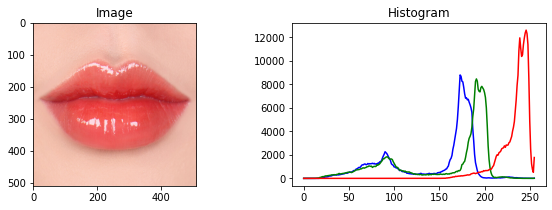

In [ ]:
draw_color_histogram_from_image('10_01.jpg')

In [ ]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)  

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

In [ ]:
#filename = train[b'filenames'][0].decode()
#file_path = os.path.join(images_dir_path, filename)
#image = cv.imread(file_path)
files = [ x for x in os.listdir(imgs_path) if "jpg" in x]
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.24820372],
       [0.31475672],
       [0.3451162 ],
       [0.01269109],
       [0.1803763 ],
       [0.22624831],
       [0.36389974],
       [0.15024339],
       [0.02694334],
       [0.07323308],
       [0.14708212],
       [0.67350924]], dtype=float32)

In [ ]:
def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 가져오자.
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    for file_name in tqdm(file_list[:244]):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)

        histogram = get_histogram(image)

        histogram_db[file_name] = histogram

    return histogram_db

In [ ]:
histogram_db = build_histogram_db() # 245 몇번에서 걸림

100%|██████████| 244/244 [00:09<00:00, 26.02it/s]


In [ ]:
histogram_db['10_02.jpg']

array([[1.9469097e-02],
       [1.7794903e-01],
       [2.6315463e-01],
       [3.0379140e-01],
       [3.4374345e-02],
       [1.6639394e-01],
       [1.0807186e-01],
       [4.5552400e-01],
       [2.9387318e-06],
       [1.4811208e-03],
       [1.5810376e-02],
       [7.4706972e-01]], dtype=float32)

In [ ]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요 : ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [ ]:
target_histogram = get_target_histogram() # 10_03
target_histogram

이미지 파일명을 입력하세요 : 10_03.jpg


array([[6.6691101e-02],
       [2.0047884e-01],
       [2.5385413e-01],
       [2.6612285e-01],
       [1.6478637e-01],
       [1.1250662e-01],
       [8.5675232e-02],
       [4.2417866e-01],
       [3.3289565e-05],
       [1.2044769e-03],
       [1.6000176e-02],
       [7.6990896e-01]], dtype=float32)

In [ ]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}

    # Calculate similarity distance by comparing histograms.
    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                   H2=histogram,
                                   method=cv2.HISTCMP_CHISQR)

        results[file_name] = distance

    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])

    return results

In [ ]:
result = search(histogram_db, target_histogram) # ... 
result

100%|██████████| 244/244 [00:00<00:00, 107129.72it/s]


{'10_03.jpg': 0.0,
 '10_02.jpg': 0.17960161887154197,
 '5_8.jpg': 0.28183569753216997,
 '7_고고.jpg': 0.2832172452443254,
 '5_3.jpg': 0.3098962155667309}

In [ ]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):    
        img_path = os.path.join(images_dir_path, filename)
        
        im = f.add_subplot(1,len(result),idx+1)
        im.grid(False)
        
        img = Image.open(img_path)
        im.imshow(img)

이미지 파일명을 입력하세요 : 10_03.jpg


100%|██████████| 244/244 [00:00<00:00, 83968.67it/s]


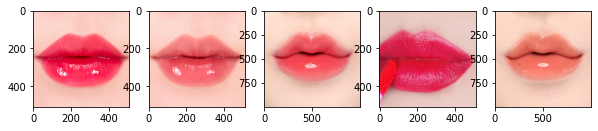

In [ ]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)